# VAE with class predictions and multiple distributions
  - LOSS
    - reconstruction error
    - KL divergence

In [30]:
from myAE import SDC_AE
import torch

manager = SDC_AE()
manager.prepare_data(less_than=2)
manager.prepare_model(4, 2)

def calc_loss(model, x, F, device):
  h = model.get_submodule("encoder")(x)
  mu = h[:, :2]
  log_sigma = h[:, 2:4]
  # class_pred = h[:, 4:]
  # class_labels = class_pred.argmax(dim=1)
  # class_idx = F.one_hot(class_labels, num_classes=2)

  sigma = log_sigma.exp()
  z = torch.rand_like(mu, device=device) * sigma + mu
  pred = model.get_submodule("decoder")(z)
  
  # dist = (((torch.stack([z]*3, dim=1) - ps).square().sum(dim=2) * idx).max(dim=1).values).mean()
  # kl_0 = 0.5*((mu.square() + sigma.square() - log_sigma - 1).sum(dim=1)*class_labels).mean()
  # kl_1 = 0.5*(((1 - mu).square() + sigma.square() - log_sigma - 1).sum(dim=1)*(1 - class_labels)).mean()
  kl = 0.5*(mu.square() + sigma.square() - log_sigma - 1).sum(dim=1).mean()
  ll = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
  # loss = ll + kl_0 + kl_1 + (kl_0 - kl_1).square()
  loss = ll + kl
  return loss

hist = manager.train(calc_loss, epochs=50)

Now, it is working on cuda:1.


100%|██████████| 50/50 [00:53<00:00,  1.08s/it]


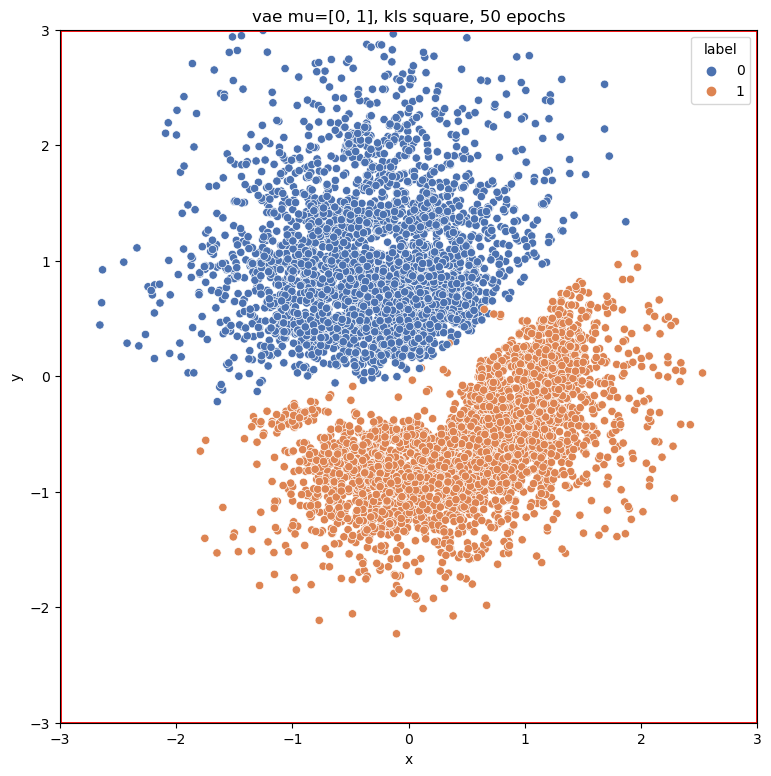

In [25]:
manager.show_latent_space('vae mu=[0, 1], kls square, 50 epochs', data_ratio=0.5, xlim=[-3, 3], ylim=[-3, 3])

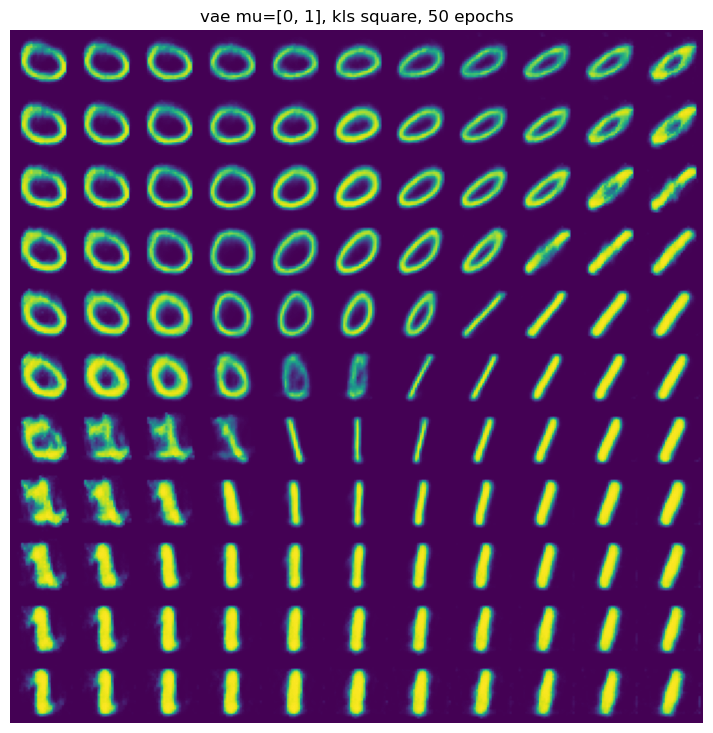

In [26]:
manager.show_latent_space('vae, 50 epochs')

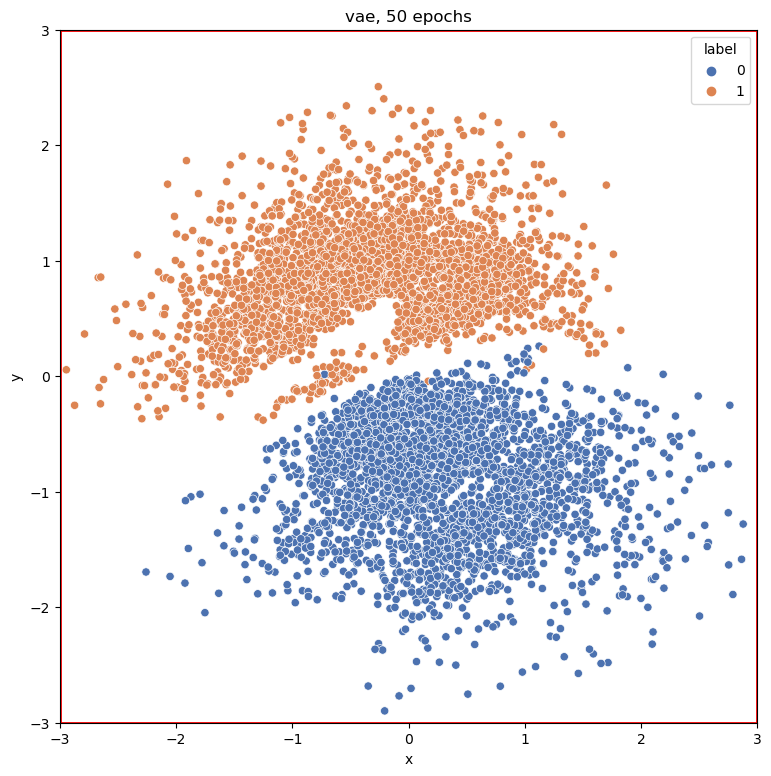

In [31]:
manager.show_latent_space('vae, 50 epochs', data_ratio=0.5, xlim=[-3, 3], ylim=[-3, 3])

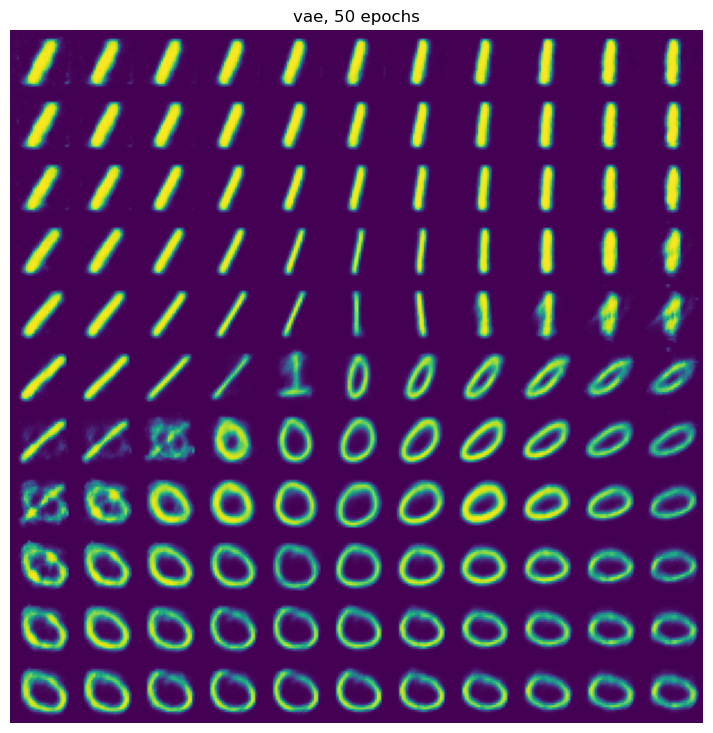

In [33]:
manager.plot_generated_images('vae, 50 epochs')